In [ ]:
from N2G import drawio_diagram

diagram = drawio_diagram()
diagram.add_diagram("Page-1")
diagram.add_node(id="R1")
diagram.add_node(id="R2")
diagram.add_link("R1", "R2", label="DF", src_label="Gi1/1", trgt_label="GE23")
diagram.layout(algo="kk")
diagram.dump_file(filename="Sample_graph.drawio", folder="./Output/")

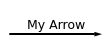

In [16]:
import schemdraw as schem
import schemdraw.elements as e

class MyArrow(e.Arrow):
    def myarrow(self, **attribs):
        self.style = attribs.get('style', '-')
        self.arrow = attribs.get('arrow', 'o')
        self.dash = attribs.get('dash', None)
        self.lw = attribs.get('lw', None)
        return self

d = schem.Drawing()
d += MyArrow().myarrow(style='-', arrow='o', lw=2).right().label('My Arrow')
d.draw()

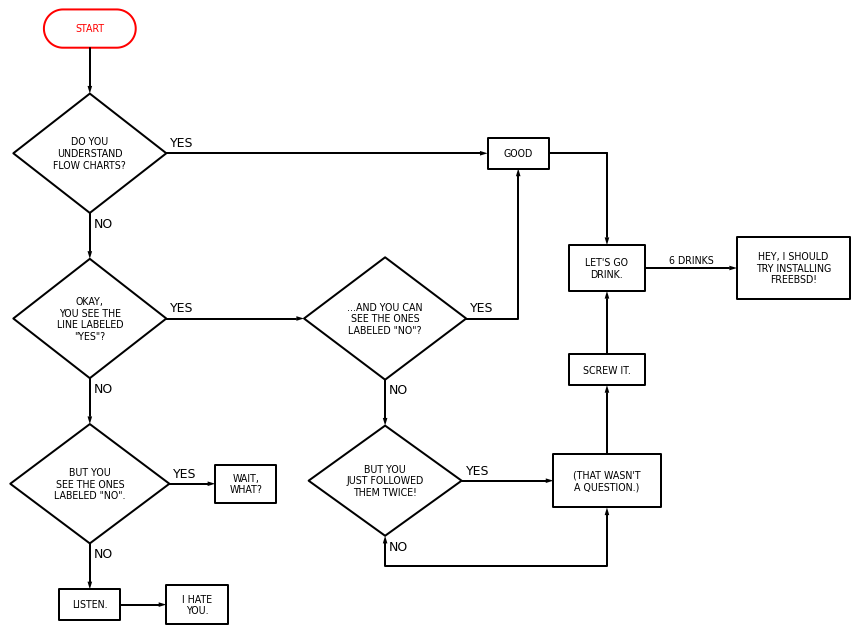

In [11]:
import schemdraw as schem
from schemdraw import flow
import schemdraw.elements as e

d = schem.Drawing()

d.config(fontsize=11)
d += (b := flow.Start().label('START').color('red'))
d += flow.Arrow().down(d.unit/2)
d += (d1 := flow.Decision(w=5, h=3.9, E='YES', S='NO').label('DO YOU\nUNDERSTAND\nFLOW CHARTS?'))
d += flow.Arrow().length(d.unit/2)
d += (d2 := flow.Decision(w=5, h=3.9, E='YES', S='NO').label('OKAY,\nYOU SEE THE\nLINE LABELED\n"YES"?'))
d += flow.Arrow().length(d.unit/2)
d += (d3 := flow.Decision(w=5.2, h=3.9, E='YES', S='NO').label('BUT YOU\nSEE THE ONES\nLABELED "NO".'))

d += flow.Arrow().right(d.unit/2).at(d3.E)
d += flow.Box(w=2, h=1.25).anchor('W').label('WAIT,\nWHAT?')
d += flow.Arrow().down(d.unit/2).at(d3.S)
d += (listen := flow.Box(w=2, h=1).label('LISTEN.'))
d += flow.Arrow().right(d.unit/2).at(listen.E)
d += (hate := flow.Box(w=2, h=1.25).anchor('W').label('I HATE\nYOU.'))

d += flow.Arrow().right(d.unit*3.5).at(d1.E)
d += (good := flow.Box(w=2, h=1).anchor('W').label('GOOD'))
d += flow.Arrow().right(d.unit*1.5).at(d2.E)
d += (d4 := flow.Decision(w=5.3, h=4.0, E='YES', S='NO').anchor('W').label('...AND YOU CAN\nSEE THE ONES\nLABELED "NO"?'))

d += flow.Wire('-|', arrow='->').at(d4.E).to(good.S)
d += flow.Arrow().down(d.unit/2).at(d4.S)
d += (d5 := flow.Decision(w=5, h=3.6, E='YES', S='NO').label('BUT YOU\nJUST FOLLOWED\nTHEM TWICE!'))
d += flow.Arrow().right().at(d5.E)
d += (question := flow.Box(w=3.5, h=1.75).anchor('W').label("(THAT WASN'T\nA QUESTION.)"))
d += flow.Wire('n', k=-1, arrow='->').at(d5.S).to(question.S)

d += flow.Line().at(good.E).tox(question.S)
d += flow.Arrow().down()
d += (drink := flow.Box(w=2.5, h=1.5).label("LET'S GO\nDRINK."))
d += flow.Arrow().right().at(drink.E).label('6 DRINKS')
d += flow.Box(w=3.7, h=2).anchor('W').label('HEY, I SHOULD\nTRY INSTALLING\nFREEBSD!')
d += flow.Arrow().up(d.unit*.75).at(question.N)
d += (screw := flow.Box(w=2.5, h=1).anchor('S').label('SCREW IT.'))
d += flow.Arrow().at(screw.N).toy(drink.S)

d.draw()


In [14]:
d.save('flowchart.jpg', dpi=300)